# Milestone 2

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic


import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier




%matplotlib inline

In [23]:
mobile = pd.read_csv("train.csv")
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [24]:
x = mobile.drop('price_range',axis=1)
y = mobile['price_range']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

# Model 1 : KNN Model

In [26]:

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

knn2 = KNeighborsClassifier(n_neighbors=12)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

# How well the Model is predicting on scale of 100

In [27]:
knn.score(x_test,y_test)

0.9090909090909091

In [28]:
knn2.score(x_test,y_test)

0.9242424242424242

# Percentage of Error in the Model

In [29]:
y_test_pred = knn.predict(x_test)
mean_squared_error(y_test_pred,y_test)

0.09090909090909091

In [30]:
y_train_pred = knn.predict(x_train)
mean_squared_error(y_train_pred,y_train)

0.05298507462686567

In [31]:
y_test_pred2 = knn.predict(x_test)
mean_squared_error(y_test_pred2,y_test)

0.09090909090909091

In [32]:
y_train_pred2 = knn.predict(x_train)
mean_squared_error(y_train_pred2,y_train)

0.05298507462686567

# Finding the best N-value for the Model

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

mses = []
for k in range(1,25):
    print("Now computing MSE for k=",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses.append(mse)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5
Now computing MSE for k= 6
Now computing MSE for k= 7
Now computing MSE for k= 8
Now computing MSE for k= 9
Now computing MSE for k= 10
Now computing MSE for k= 11
Now computing MSE for k= 12
Now computing MSE for k= 13
Now computing MSE for k= 14
Now computing MSE for k= 15
Now computing MSE for k= 16
Now computing MSE for k= 17
Now computing MSE for k= 18
Now computing MSE for k= 19
Now computing MSE for k= 20
Now computing MSE for k= 21
Now computing MSE for k= 22
Now computing MSE for k= 23
Now computing MSE for k= 24


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

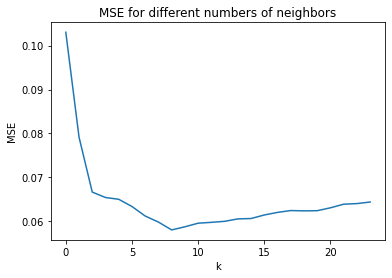

In [34]:
plt.plot(mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")

# Model 2 : Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.8696969696969697

In [36]:
y_test_pred_rf = rf.predict(x_test)
mean_squared_error(y_test_pred_rf,y_test)

0.1303030303030303

In [37]:
y_train_pred_rf = rf.predict(x_train)
mean_squared_error(y_train_pred_rf,y_train)

0.0

# Different n-value

In [38]:
rf2 = RandomForestClassifier(n_estimators=300)
rf2.fit(x_train, y_train)


RandomForestClassifier(n_estimators=300)

In [39]:
y_test_pred_rf2 = rf2.predict(x_test)
mean_squared_error(y_test_pred_rf2,y_test)

0.1303030303030303

In [40]:
y_train_pred_rf2 = rf2.predict(x_train)
mean_squared_error(y_train_pred_rf2,y_train)

0.0

In [41]:
mses2 = []
for k in [50,100,150,200,250,300,350,400,450,500]:
    print("Now computing MSE for k=",k)
    iknn_scaled = RandomForestClassifier(n_estimators = k)
    iknn_scaled.fit(x_train, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses2.append(mse)

Now computing MSE for k= 50
Now computing MSE for k= 100
Now computing MSE for k= 150
Now computing MSE for k= 200
Now computing MSE for k= 250
Now computing MSE for k= 300
Now computing MSE for k= 350
Now computing MSE for k= 400
Now computing MSE for k= 450
Now computing MSE for k= 500


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

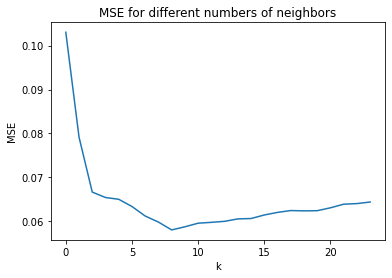

In [42]:
plt.plot(mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")

# Conclusion K-Nearest Neighbors performed better at predicting the price